In [12]:
# Importowanie bibliotek
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, widgets

# Styl wykresów
sns.set(style="whitegrid")

In [14]:
# Wczytanie danych transakcyjnych
years = [2016, 2017, 2018, 2019]
dfs = [pd.read_csv(f"transactions-{year}.csv") for year in years]
transactions = pd.concat(dfs)

In [17]:
# Wczytanie danych klientów
customers = pd.read_csv("customers.csv")



In [ ]:
# Konwersja daty i dzień tygodnia
transactions['tran_date'] = pd.to_datetime(transactions['tran_date'], format='mixed', dayfirst=True)
transactions['weekday'] = transactions['tran_date'].dt.day_name()

In [28]:
print(customers.columns)
print(transactions.columns)

Index(['Unnamed: 0', 'customer_Id', 'DOB', 'Gender', 'country_code'], dtype='object')
Index(['Unnamed: 0', 'transaction_id', 'cust_id', 'tran_date',
       'prod_subcat_code', 'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt',
       'Store_type', 'weekday'],
      dtype='object')


In [29]:
# Usuwanie zbędnych kolumn
transactions = transactions.drop(columns=['Unnamed: 0'])
customers = customers.drop(columns=['Unnamed: 0'])

# Łączenie danych
data = transactions.merge(customers, left_on='cust_id', right_on='customer_Id', how='left')

In [30]:
# Sprawdzenie unikalnych kanałów sprzedaży
store_types = data['Store_type'].dropna().unique()
store_types.sort()

In [31]:
# Funkcja do analizy sprzedaży wg dnia tygodnia i charakterystyki klientów
def analyze_store(store_type):
    df = data[data['Store_type'] == store_type]
    
    # Sprzedaż wg dnia tygodnia
    weekday_sales = df.groupby('weekday')['total_amt'].sum().reindex([
        'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
    ])
    
    # 🎨 Wykres sprzedaży w dniach tygodnia
    plt.figure(figsize=(10, 4))
    sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette="Blues_d")
    plt.title(f'Sprzedaż wg dnia tygodnia - {store_type}')
    plt.ylabel('Suma sprzedaży')
    plt.xticks(rotation=45)
    plt.show()

NameError: name 'df' is not defined

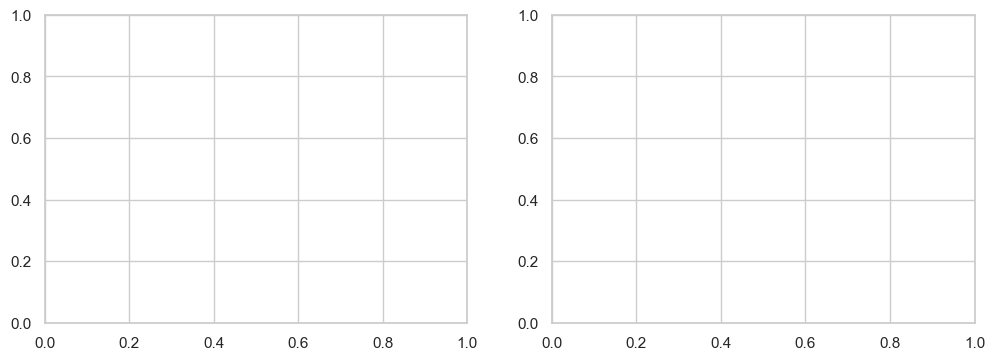

In [38]:
# Charakterystyka klientów
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Rozkład płci
gender_counts = df['Gender'].value_counts()
axs[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Płeć klientów')

# Rozkład wieku
sns.histplot(df['age'], bins=15, kde=True, ax=axs[1], color='green')
axs[1].set_title('Rozkład wieku klientów')
axs[1].set_xlabel('Wiek')

plt.tight_layout()
plt.show()

# Interaktywny wybór kanału sprzedaży
interact(analyze_store, store_type=widgets.Dropdown(
options=store_types,
description='Kanał sprzedaży:',
style={'description_width': 'initial'}
))